# Limpieza y Correlación de datos 

En este cuaderno se documentará el proceso de limpieza de datos y análisis de relación de los mismos para determinar los parámetros a utilizar dentro del proyecto Betty

## Datos

Se usará el backup de una base de datos en SQL Server que provee **Exek S.A.S.**. El código siguiente representa la conexión a la base de datos

In [1]:
import pyodbc
import pandas as pd
import numpy as np

driver = 'SQL Server'
server = 'MARCO'
db1 = 'AI_Eafit'
tcon = 'yes'
uname = 'aieafit'
pword = 'marANT1502'

cnxn = pyodbc.connect(driver='{SQL Server}', host=server, database=db1,
                      trusted_connection=tcon, user=uname, password=pword)

### Seleccionar y normalizar los datos a Analizar

Se trabajará con datos de las tablas *dbo.Fact_Compra*, *dbo.T_Fact_pedido*, *dbo.T_Fact_Inventario*, *dbo.T_Fact_venta*. El proceso de normalización se ejecutará al pasar todos los datos a formato entero o de punto flotante. Para más información revisar documento conjunto a este cuaderno

#### Datos dbo.Fact_Compra

In [80]:
query_compras = "SELECT Id_Producto, Id_Bodega, Id_Comprador, Fecha_Orden_Compra, Fecha_Entrega_Planeada, Linea_Orden_Compra, Compra_Cantidad, Compra_Pesos, Precio_Unitario_Moneda, Linea_a_Tiempo, Linea_Completa, Linea_Perfecta, Lead_Time_Teorico_Compra, Lead_Time_Real_Min_Compra, Lead_Time_Real_Max_Compra FROM dbo.T_Fact_compra"
df_compras = pd.read_sql(query_compras, cnxn)

df_compras['Fecha_Orden_Compra'] = df_compras['Fecha_Orden_Compra'].str.replace(r'-', '')
df_compras['Fecha_Orden_Compra'] = df_compras['Fecha_Orden_Compra'].astype('int64')
df_compras['Fecha_Entrega_Planeada'] = df_compras['Fecha_Entrega_Planeada'].str.replace(r'-', '')
df_compras['Fecha_Entrega_Planeada'] = df_compras['Fecha_Entrega_Planeada'].astype('int64')

df_compras.head()

,Id_Producto,Id_Bodega,Id_Comprador,Fecha_Orden_Compra,Fecha_Entrega_Planeada,Linea_Orden_Compra,Compra_Cantidad,Compra_Pesos,Precio_Unitario_Moneda,Linea_a_Tiempo,Linea_Completa,Linea_Perfecta,Lead_Time_Teorico_Compra,Lead_Time_Real_Min_Compra,Lead_Time_Real_Max_Compra
0,2353,3,15348,20181106,20181106,116669,120.0,152640.0,1272.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4769,3,15348,20181106,20181106,116680,6.0,61566.0,10261.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8561,3,15348,20181106,20181106,116705,24.0,71544.0,2981.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6145,4,5964,20181109,20181116,117044,12.0,112320.0,9360.0,1.0,1.0,1.0,7.0,7.0,7.0
4,2353,4,5964,20181109,20181116,117088,216.0,274752.0,1272.0,1.0,1.0,1.0,7.0,7.0,7.0


#### dbo.Fact_pedido

In [65]:
query_pedidos = "SELECT Id_Producto, Id_Vendedor, Id_Bodega, Fecha_Pedido, Fecha_Entrega_Planeada, Pedidos_Pesos_bruto, Pedido_Cantidad, Pedido_Descuento_Pesos, Pedido_Cantidad_Pendiente, conteo_linea_pedido, Linea_a_Tiempo, Linea_Completa, Linea_Perfecta, Pedido_Cantidad_Facturada, Pedido_Pesos_Facturados, Lead_time_Pedido_teorico, Lead_time_pedido_real_min, Lead_time_pedido_real_max FROM dbo.T_Fact_pedido"
df_pedidos = pd.read_sql(query_pedidos, cnxn)

df_pedidos['Fecha_Pedido'] = df_pedidos['Fecha_Pedido'].str.replace(r'-', '')
df_pedidos['Fecha_Pedido'] = df_pedidos['Fecha_Pedido'].astype('int64')
df_pedidos['Fecha_Entrega_Planeada'] = df_pedidos['Fecha_Entrega_Planeada'].str.replace(r'-', '')
df_pedidos['Fecha_Entrega_Planeada'] = df_pedidos['Fecha_Entrega_Planeada'].astype('int64')

df_pedidos.head()

,Id_Producto,Id_Vendedor,Id_Bodega,Fecha_Pedido,Fecha_Entrega_Planeada,Pedidos_Pesos_bruto,Pedido_Cantidad,Pedido_Descuento_Pesos,Pedido_Cantidad_Pendiente,conteo_linea_pedido,Linea_a_Tiempo,Linea_Completa,Linea_Perfecta,Pedido_Cantidad_Facturada,Pedido_Pesos_Facturados,Lead_time_Pedido_teorico,Lead_time_pedido_real_min,Lead_time_pedido_real_max
0,3108,5958,4,20151106,20151121,313920.0,12.0,0.0,0.0,1.0,1.0,1.0,1.0,12.0,313920.0,15.0,1.0,1.0
1,2504,5955,3,20151215,20151216,51765.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,51765.0,1.0,0.0,0.0
2,2204,5958,4,20151123,20151124,210480.0,24.0,0.0,0.0,1.0,1.0,1.0,1.0,24.0,210480.0,1.0,0.0,0.0
3,4983,5958,4,20151125,20151126,102181.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,102181.0,1.0,0.0,0.0
4,2997,5958,4,20140805,20140806,230000.0,2000.0,0.0,0.0,1.0,1.0,1.0,1.0,2000.0,230000.0,1.0,1.0,1.0


#### dbo.T_Fact_Inventario

In [62]:
query_inventario = "SELECT Fecha_Inventario, Id_Bodega, Id_Producto, Inventario_Cantidad, Inventario_Pesos FROM dbo.T_Fact_Inventario"
df_inventario = pd.read_sql(query_inventario, cnxn)

df_inventario['Fecha_Inventario'] = df_inventario['Fecha_Inventario'].str.replace(r'-', '')
df_inventario['Fecha_Inventario'] = df_inventario['Fecha_Inventario'].astype('int64')

print(df_inventario.dtypes)
df_inventario.head()

Fecha_Inventario         int64
Id_Bodega                int64
Id_Producto              int64
Inventario_Cantidad    float64
Inventario_Pesos       float64
dtype: object


,Fecha_Inventario,Id_Bodega,Id_Producto,Inventario_Cantidad,Inventario_Pesos
0,20170131,1,4621,-8.0,-138603.52
1,20170131,1,3297,-1.0,-81704.25
2,20170131,1,3544,9.0,82800.00
3,20170131,5,2931,-13.0,-104000.00
4,20170131,3,4810,-24.0,-151200.72


#### dbo.T_Fact_venta

In [63]:
query_venta = "SELECT Id_Producto, Id_Vendedor, Id_Bodega, Fecha_Factura, Venta_Cantidad, Venta_Neta, Venta_Costo_Pesos, Venta_margen_pesos, Pedido_Numero_Linea FROM dbo.T_Fact_venta"
df_venta = pd.read_sql(query_venta, cnxn)

df_venta['Fecha_Factura'] = df_venta['Fecha_Factura'].str.replace(r'-', '')
df_venta['Fecha_Factura'] = df_venta['Fecha_Factura'].astype('int64')

print(df_venta.dtypes)
df_venta.head()

Id_Producto              int64
Id_Vendedor              int64
Id_Bodega                int64
Fecha_Factura            int64
Venta_Cantidad         float64
Venta_Neta             float64
Venta_Costo_Pesos      float64
Venta_margen_pesos     float64
Pedido_Numero_Linea    float64
dtype: object


,Id_Producto,Id_Vendedor,Id_Bodega,Fecha_Factura,Venta_Cantidad,Venta_Neta,Venta_Costo_Pesos,Venta_margen_pesos,Pedido_Numero_Linea
0,3285,18275,12,20181218,6.0,60323.0,52183.32,8139.68,933329.0
1,2196,18275,12,20181218,6.0,70560.0,56448.00,14112.00,933303.0
2,2199,18275,12,20181218,12.0,141120.0,112896.00,28224.00,933306.0
3,2263,18275,12,20181218,2.0,60480.0,48384.00,12096.00,933310.0
4,7275,18275,12,20181218,25.0,106245.0,82724.00,23521.00,933325.0


## Correlación de datos a analizar

A continuación se analizará la correlación de los datos por dataframe a utilizar

### Correlación dbo.Fact_Compra

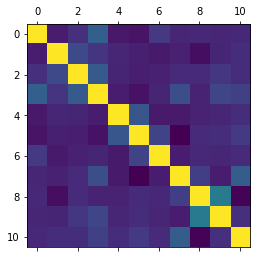

In [85]:
import matplotlib.pyplot as plt
corr_compras = df_compras.corr()
plt.matshow(corr_compras)
plt.show()

### Correlación dbo.Fact_pedidos

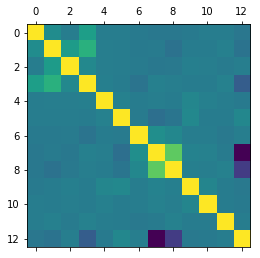

In [86]:
import matplotlib.pyplot as plt
corr_pedidos = df_pedidos.corr()
plt.matshow(corr_pedidos)
plt.show()

### Correlación dbo.Fact_Inventario

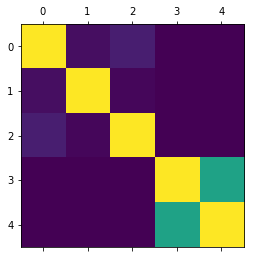

In [73]:
import matplotlib.pyplot as plt

labels = ['Fecha_Inventario' , 'Id_Bodega' , 'Id_Producto' , 'Inventario_Cantidad' , 'Inventario_Pesos']
corr_inventario = df_inventario.corr()
plt.matshow(corr_inventario)
plt.show()

### Correlación dbo.Fact_Ventas

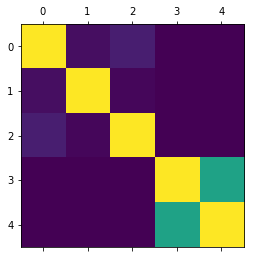

In [67]:
import matplotlib.pyplot as plt
corr_ventas = df_inventario.corr()
plt.matshow(corr_ventas)
plt.show()

## Limpieza de Variables

Se van a eliminar de los data frames las variables que pueden causar multicolinealidad en el modelo

## dbo.Fact_Compras

In [84]:
del df_compras['Fecha_Entrega_Planeada']
del df_compras['Linea_Orden_Compra']
del df_compras['Linea_a_Tiempo']
del df_compras['Lead_Time_Real_Min_Compra']
df_compras.head()

KeyError: 'Fecha_Entrega_Planeada'

## dbo.Fact_pedidos

In [83]:
del df_pedidos['Fecha_Pedido']
del df_pedidos['Pedidos_Pesos_bruto']
del df_pedidos['Pedido_Cantidad']
del df_pedidos['Linea_a_Tiempo']
del df_pedidos['Lead_time_pedido_real_min']
df_pedidos.head()

,Id_Producto,Id_Vendedor,Id_Bodega,Fecha_Entrega_Planeada,Pedido_Descuento_Pesos,Pedido_Cantidad_Pendiente,conteo_linea_pedido,Linea_Completa,Linea_Perfecta,Pedido_Cantidad_Facturada,Pedido_Pesos_Facturados,Lead_time_Pedido_teorico,Lead_time_pedido_real_max
0,3108,5958,4,20151121,0.0,0.0,1.0,1.0,1.0,12.0,313920.0,15.0,1.0
1,2504,5955,3,20151216,0.0,0.0,1.0,1.0,1.0,1.0,51765.0,1.0,0.0
2,2204,5958,4,20151124,0.0,0.0,1.0,1.0,1.0,24.0,210480.0,1.0,0.0
3,4983,5958,4,20151126,0.0,0.0,1.0,1.0,1.0,1.0,102181.0,1.0,0.0
4,2997,5958,4,20140806,0.0,0.0,1.0,1.0,1.0,2000.0,230000.0,1.0,1.0
